In [0]:
from __future__ import absolute_import, division, print_function
import os
import matplotlib.pyplot as plt
import numpy as np


In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [3]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin = _URL , extract = True)

68608000/68606236 [==============================] - 0s 0us/step


In [4]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs


In [0]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [6]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))
num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))
total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val
print('total training cat images', num_cats_tr)
print('total training dog images', num_dogs_tr)
print('total validation cat images', num_cats_val)
print('total validation dog images', num_dogs_val)
print('total training images', total_train)
print('total validation images', total_val)

total training cat images 1000
total training dog images 1000
total validation cat images 500
total validation dog images 500
total training images 2000
total validation images 1000


In [0]:
BATCH_SIZE = 100
IMG_SHAPE = 150

In [0]:
train_image_generator = ImageDataGenerator(rescale= 1./255)
validation_image_generator = ImageDataGenerator(rescale= 1./255)

In [9]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE, 
                                                           directory= train_dir,
                                                           shuffle = True,
                                                            target_size = (IMG_SHAPE,IMG_SHAPE),
                                                            class_mode = 'binary' )

Found 2000 images belonging to 2 classes.


In [10]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                               directory= validation_dir,
                                                           shuffle = False,
                                                            target_size = (IMG_SHAPE,IMG_SHAPE),
                                                            class_mode = 'binary' )

Found 1000 images belonging to 2 classes.


In [0]:
sample_training_images, _ = next(train_data_gen)

In [0]:
def plotimage(image_arr):
    fig, axes = plt.subplots(1,5, figsize = (20,20))
    #axes = axes.flatten()
    for img, ax in zip(image_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.imshow(x)

NameError: ignored

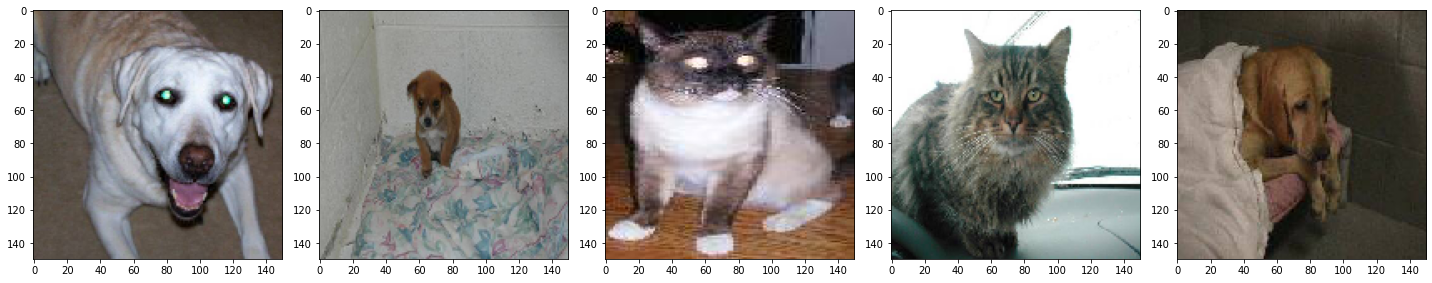

In [13]:
plotimage(sample_training_images[:5])

In [0]:
model = tf.keras.models.Sequential([
                                  tf.keras.layers.Conv2D(32,(3,3), activation = 'relu', input_shape=(150,150,3)),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Conv2D(64,(3,3), activation ='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512, activation = 'relu'),
                                  tf.keras.layers.Dense(100, activation = 'relu'),
                                  tf.keras.layers.Dense(2, activation = 'softmax')    ])

In [0]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 128)      

In [25]:
EPOCHS = 50
history = model.fit_generator( train_data_gen, steps_per_epoch= int(np.ceil(total_train/float(BATCH_SIZE))),
                              epochs = EPOCHS,
                              validation_data = val_data_gen,
                              validation_steps = int(np.ceil(total_val/float(BATCH_SIZE)))  )

Epoch 1/50
20/20 [==============================] - 8s 394ms/step - loss: 0.7112 - accuracy: 0.5005 - val_loss: 0.6883 - val_accuracy: 0.5000
Epoch 2/50
20/20 [==============================] - 8s 389ms/step - loss: 0.6896 - accuracy: 0.5595 - val_loss: 0.6759 - val_accuracy: 0.5880
Epoch 3/50
20/20 [==============================] - 8s 389ms/step - loss: 0.6725 - accuracy: 0.5690 - val_loss: 0.6560 - val_accuracy: 0.5960
Epoch 4/50
20/20 [==============================] - 8s 398ms/step - loss: 0.6490 - accuracy: 0.6145 - val_loss: 0.6173 - val_accuracy: 0.6720
Epoch 5/50
20/20 [==============================] - 8s 392ms/step - loss: 0.6171 - accuracy: 0.6490 - val_loss: 0.6539 - val_accuracy: 0.6150
Epoch 6/50
20/20 [==============================] - 8s 394ms/step - loss: 0.5929 - accuracy: 0.6860 - val_loss: 0.5871 - val_accuracy: 0.6780
Epoch 7/50
20/20 [==============================] - 8s 398ms/step - loss: 0.5336 - accuracy: 0.7250 - val_loss: 0.5816 - val_accuracy: 0.6890
Epoch 